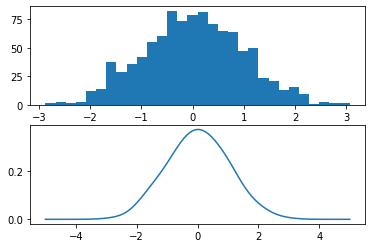

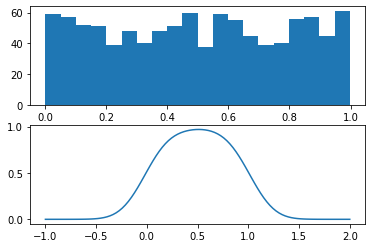

In [37]:
#DEFAULT CODE
import numpy as np
import matplotlib.pyplot as plt

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd

# Plot normal distribution
fig, ax = plt.subplots(2)
x = np.random.randn(1000)
ax[0].hist(x, bins=30) # number of bins

ks_density = ksdensity(x, width=0.4)
# np.linspace(start, stop, number of steps)
x_values = np.linspace(-5., 5., 100)
ax[1].plot(x_values, ks_density(x_values))

# Plot uniform distribution
fig2, ax2 = plt.subplots(2)
x = np.random.rand(1000)
ax2[0].hist(x, bins=20)

ks_density = ksdensity(x, width=0.2)
x_values = np.linspace(-1., 2., 100)
ax2[1].plot(x_values, ks_density(x_values))
plt.show()

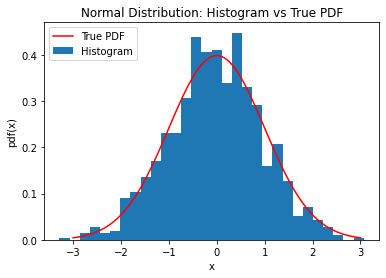

In [38]:
#Experimental Work
# 2.1. Plot histograms of the generated numbers and overlay these on plots of the exact
# normal and uniform probability density functions (scaled appropriately to match
# the histogram count data).

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

np.random.seed(200)

#Plotting the true normal distribution
mu = 0
variance = 1
sigma = math.sqrt(variance)
x_g = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_g, stats.norm.pdf(x_g, mu, sigma), "-r", label = "True PDF")

#Plotting the histogram for the normal distribution
x = np.random.randn(1000) # normal distribution
plt.hist(x, bins=30, density = True, label = "Histogram") # number of bins # density = True to normalise the histogram

plt.title('Normal Distribution: Histogram vs True PDF')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend(loc="upper left")
plt.show()

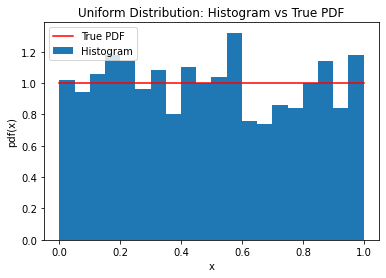

In [39]:
#Experimental Work
# 2.1. Plot histograms of the generated numbers and overlay these on plots of the exact
# normal and uniform probability density functions (scaled appropriately to match
# the histogram count data).

#Plotting true uniform distribution
uniform = np.random.rand(1000)
x_u = np.linspace(0, 1, 100)
plt.plot(x_u, stats.uniform.pdf(x_u), "-r", label = "True PDF")

x = np.random.rand(1000) # uniform distribution
plt.hist(x, bins=20, density = True, label = "Histogram") # Plot histogram

plt.title('Uniform Distribution: Histogram vs True PDF')
plt.legend(loc="upper left")
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

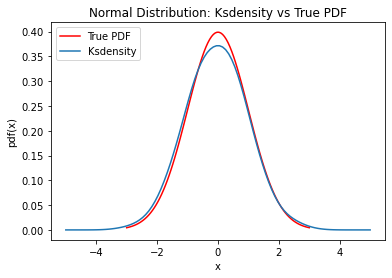

In [40]:
# Experiment also with using the ksdensity function in Matlab/Python, to plot
# a smooth density function

import numpy as np
import matplotlib.pyplot as plt

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd

#Plotting the true normal distribution
mu = 0
variance = 1
sigma = math.sqrt(variance)
x_g = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_g, stats.norm.pdf(x_g, mu, sigma), "-r", label = 'True PDF')

x = np.random.randn(1000)
ks_density = ksdensity(x, width=0.4)
# np.linspace(start, stop, number of steps)
x_values = np.linspace(-5., 5., 100)
plt.plot(x_values, ks_density(x_values), label = "Ksdensity") # Plot ksdensity normal distribution

plt.title('Normal Distribution: Ksdensity vs True PDF')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend(loc="upper left")
plt.show()

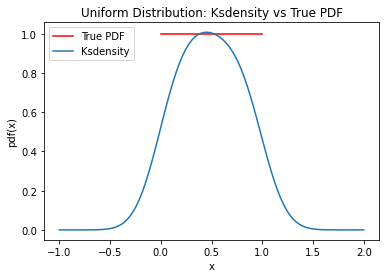

In [41]:
# Experiment also with using the ksdensity function in Matlab/Python, to plot
# a smooth density function

#Plotting true uniform distribution
uniform = np.random.rand(1000)
x_u = np.linspace(0, 1, 100)
plt.plot(x_u, stats.uniform.pdf(x_u), '-r', label = 'True PDF')

x = np.random.rand(1000)
ks_density = ksdensity(x, width=0.2)
x_values = np.linspace(-1., 2., 100)
plt.plot(x_values, ks_density(x_values), label = 'Ksdensity') # Plot ksdensity uniform distribution

plt.title('Uniform Distribution: Ksdensity vs True PDF')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend(loc="upper left")
plt.show()

Comment on the advantages and disadvantages of the kernel density method compared with the
histogram method for estimation of a probability density from random samples.

- We can see that the ksdensity gives us a better approximation of the overall pdf.
- For the normal distribution, the ksdensity is almost exactly the same as the true pdf
- For larger numbers of N, we can see that the histogram will converge with probability to the actual probability density function, as stated by the weak law of large numbers. However, this in itself is a disadvantage, as this means that we will need to gather alot more data to get a good representation of the pdf, as opposed to the kernal density method.
- increasing width of the kernal density method leads to worse approximation of the true pdf (gets flatter), meanwhile, decreasing the width of the kernal density method makes it more accurate but has much more spikes/noise in it. THis means that to get a good approximation of the pdf via the kernal density method, we will need to iterate over a wide range of width values until we find the one that fits it the best. - i.e. the width has to be chosen carefully. Meanwhile histogram does not have the hyperparameter.

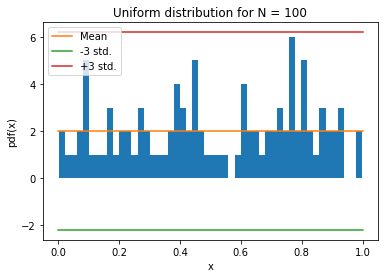

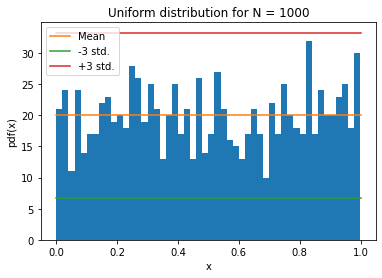

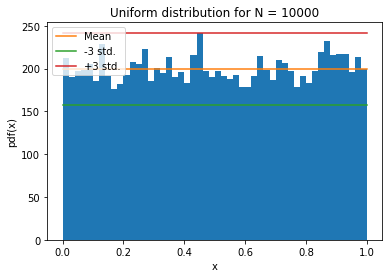

Mean: 2.0
Variance: 1.96
Standard Deviation: 1.4
 
Mean: 20.0
Variance: 19.6
Standard Deviation: 4.427188724235731
 
Mean: 200.0
Variance: 196.0
Standard Deviation: 14.0


In [42]:
# 100
N = 100
bin_num = 50
p = 1/bin_num
mean_uniform = N*p
variance_uniform = N*p*(1-p)
standard_uniform = variance_uniform**(0.5)

uniform = np.random.rand(N)
plt.hist(uniform, bins=bin_num)
x = np.linspace(0, 1, 100)
plt.plot(x,np.ones(len(x))* mean_uniform, label = 'Mean')
plt.plot(x,np.ones(len(x))* (mean_uniform - 3*standard_uniform), label = '-3 std.')
plt.plot(x,np.ones(len(x))* (mean_uniform + 3*standard_uniform), label = '+3 std.')
plt.title('Uniform distribution for N = 100')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend(loc="upper left")
plt.show()

#1000
N_1000 = 1000 
mean_uniform_1000 = N_1000*p
variance_uniform_1000 = N_1000*p*(1-p)
standard_uniform_1000 = variance_uniform_1000**(0.5)

uniform = np.random.rand(N_1000)
plt.hist(uniform, bins=bin_num)
x = np.linspace(0, 1, 100)
plt.plot(x,np.ones(len(x))* mean_uniform_1000, label = 'Mean')
plt.plot(x,np.ones(len(x))* (mean_uniform_1000 - 3*standard_uniform_1000), label = '-3 std.')
plt.plot(x,np.ones(len(x))* (mean_uniform_1000 + 3*standard_uniform_1000), label = '+3 std.')
plt.title('Uniform distribution for N = 1000')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend(loc="upper left")
plt.show()

#10000
N_10000 = 10000 
mean_uniform_10000 = N_10000*p
variance_uniform_10000 = N_10000*p*(1-p)
standard_uniform_10000 = variance_uniform_10000**(0.5)

uniform = np.random.rand(N_10000)
plt.hist(uniform, bins=bin_num)
x = np.linspace(0, 1, 100)
plt.plot(x,np.ones(len(x))* mean_uniform_10000, label = 'Mean')
plt.plot(x,np.ones(len(x))* (mean_uniform_10000 - 3*standard_uniform_10000),label = '-3 std.')
plt.plot(x,np.ones(len(x))* (mean_uniform_10000 + 3*standard_uniform_10000),label = '+3 std.')
plt.title('Uniform distribution for N = 10000')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.legend(loc="upper left")
plt.show()

print ("Mean:" , mean_uniform)
print ("Variance:" , variance_uniform)
print ("Standard Deviation:" , standard_uniform)
print (" ")

print ("Mean:" , mean_uniform_1000)
variance_uniform_1000 = N_1000*p*(1-p)
print ("Variance:" , variance_uniform_1000)
standard_uniform = variance_uniform_1000**(0.5)
print ("Standard Deviation:" , standard_uniform_1000)

print (" ")

print ("Mean:" , mean_uniform_10000)
variance_uniform_10000 = N_10000*p*(1-p)
print ("Variance:" , variance_uniform_10000)
standard_uniform = variance_uniform_10000**(0.5)
print ("Standard Deviation:" , standard_uniform_10000)


For the uniform distribution, calculate the theoretical mean and standard deviation for the histogram count data, as a function of N (using the multinomial distribution theory from above).
- probability of getting one of the bins = (1/bin_number), and they all have equal probability due to it being a uniform distribution
- Due to the multinomial distribution theory, we can say that the mean of one of the bins will be N * Pj, where N is the number of smaples and Pj is the probability of being within that bin, which we found out to be 1/bin_num. Each bin having the same probability (and same N) leads to:
- Therefore the mean for each bin will be the same as the overall mean (mean for histogram count data/mean for the number of samples in each bin).
- For the variance, the equation is given by Np(1-p), therefore the standard deviration will be the sqrt of that. As we have said before, the probability for each bin is the same, therefore, the sdv. for each bin will be the same, and so standard deviation for the histogram count data will be equal to Np(1-P)


Explain what happens to the histogram estimate as N becomes large.
- the estimate gets better as N becomes large due to the WLLN as we said before 

Are your histogram results consistent with the multinomial distribution theory? (in
other words, are the histograms consistent with Matlab/Python having generated
accurate uniformly distributed random variates?)

- Yes,we can see that the count data for each bin converges to the mean line, as N increase, ie histograms become mroe consistent with Python havign generated accurate uniformly distributed random variables as N incresaes.




# 2.2 

 - p'(y)  = p((y-b)/a) / a, where p() = normal distribution with mean 0 variance 1
 - N( (y - b)/a ) -> expand this out in Gaussian pdf terms and make it into Normal distribution form, and then show that it has non -zero mean and non-zero variance.
 - so we can show that it becomes a Normal distribution with variance= a^2, and mean = b.
 
 
 

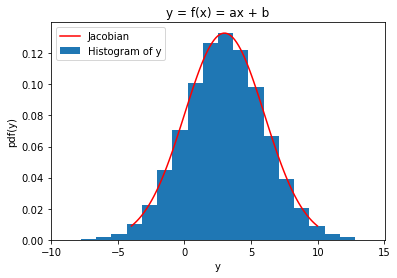

In [43]:
#Verify this formula by transforming a large collection of random samples x(i) to give y(i) = f(x(i)), histogramming the resulting y samples, and overlaying a plot of
#your formula calculated using the Jacobian 

# p(y) = Px((y-b)/a) * (1) . This is the normally distributed function 
# shifted by (y-b)/a in the x-axis, which is basically a general normal desnity
# function with non-zero mean (shifted by b) and non-zero varaince (multiplied by a^2)
# New mean = b/a, variance = a^2

#Task2: calculate p(y)
from scipy.stats import norm
a = 3 #to change 
b = 3
y = a*x + b 
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

uniform = np.random.randn(10000)
plt.hist(a*uniform + b, bins=20, density = True, label = 'Histogram of y')

y = np.linspace(a*norm.ppf(0.01)+b,
                a*norm.ppf(0.99)+b, 100)
py = norm.pdf((y-b)/a)
plt.plot(y ,py/a, '-r', label = 'Jacobian')

plt.title('y = f(x) = ax + b')
plt.xlabel('y')
plt.ylabel('pdf(y)')
plt.legend(loc="upper left")
plt.show()


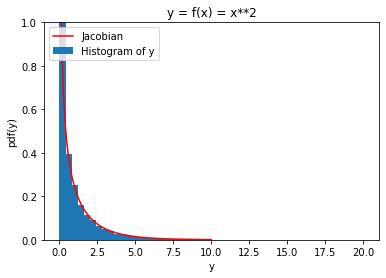

In [44]:
# f(x) = x^2

# p(y) = Px(rooty) * (0.5) y ** -0.5

from scipy.stats import norm
a = 3 #to change 
b = 3
y = x**2
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

uniform = np.random.randn(10000)
plt.hist(uniform**2, bins=50, density = True, label = 'Histogram of y')

y = np.linspace(0.0001,
                10, 10000)
py = norm.pdf((y**0.5)) * 0.5 * y ** (-0.5) 
plt.plot(y ,py*2, '-r', label = 'Jacobian')

plt.title('y = f(x) = x**2')
plt.xlabel('y')
plt.ylabel('pdf(y)')
plt.legend(loc="upper left")
plt.ylim(0, 1)
plt.show()


<ipython-input-52-f9d6da98a5b1>:7: RuntimeWarning: invalid value encountered in log
  inverse_cdf = -np.log(1-y)


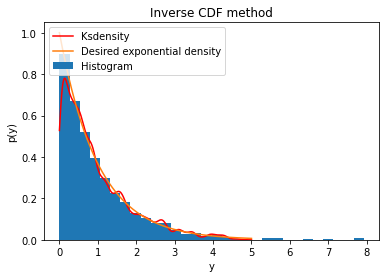

In [52]:
# 3  Inverse CDF Method
#Task3: Calculate the CDF and the inverse CDF for this distribution.

import math
y = np.linspace(0,5,1000)
cdf = 1-np.exp(-y)
inverse_cdf = -np.log(1-y)




import matplotlib.pyplot as plt
import numpy as np

y = np.linspace(0,5,1000)
x = np.random.rand(1000)
inverse_cdf_sample = -np.log(1-x)

plt.hist(inverse_cdf_sample, bins=30, density = True, label = "Histogram")

ks_density = ksdensity(inverse_cdf_sample, width=0.1)
plt.plot(y, ks_density(y), '-r', label = "Ksdensity")

exponential = np.exp(-y)
plt.plot(y, exponential, label = 'Desired exponential density')

plt.title('Inverse CDF method')
plt.xlabel('y')
plt.ylabel('p(y)')
plt.legend(loc="upper left")
plt.show()

In [46]:
# 4. Simulation from non standard densities

# Range of integration is from 0 to infinity as it is integrating over u,
# which is the probability density function of random variances, and as 
# variance = std.^2, it is always positive, therefore the values of 
# p(u) are always positive, and so we take integration from 0 instead
# of minus infinity.


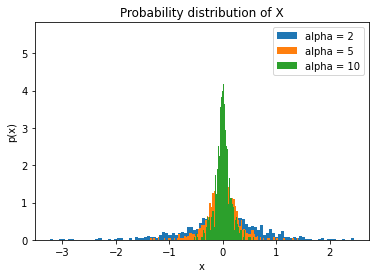

In [47]:
def generate_N(alpha): 
    u = -(2/alpha**2)*np.log(1-np.random.uniform(0,1))
    x = np.random.normal(0, np.sqrt(u))
    return x

N_array = []
N = 1000
alpha = 2
for i in range(N): 
    N_array.append(generate_N(alpha))




def generate_N(alpha): 
    u = -(2/alpha**2)*np.log(1-np.random.uniform(0,1))
    x = np.random.normal(0, np.sqrt(u))
    return x

alpha_2 = []
alpha_5 = []
alpha_10 = []
for i in range (1000): 
    alpha_2.append(generate_N(2))

    
for i in range (1000): 
    alpha_5.append(generate_N(5))
    
for i in range (1000): 
    alpha_10.append(generate_N(10))
    
plt.hist(alpha_2, bins = 100, label = "alpha = 2", density = True)
plt.hist(alpha_5, bins = 100, label = "alpha = 5", density = True)
plt.hist(alpha_10, bins = 100, label = "alpha = 10", density = True)
plt.title('Probability distribution of X')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

# Increasing alpha leads to a narrower probability density function.
# Increasing slpha means higher probability for pu to sample lower values
#for variance, therefore mroe likely to get low variances
# Thus, this leads to narrower pdfs for the normal distribution

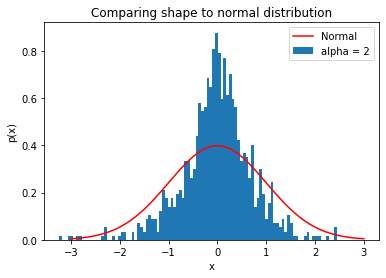

In [48]:
# compare shape of distribution to normal distribution

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.hist(alpha_2, bins = 100, label = "alpha = 2", density = True)

mu = 0
variance = 1
sigma = math.sqrt(variance)
x_g = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x_g, stats.norm.pdf(x_g, mu, sigma), "-r", label = 'Normal')
plt.title('Comparing shape to normal distribution')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

#Close-ish shape

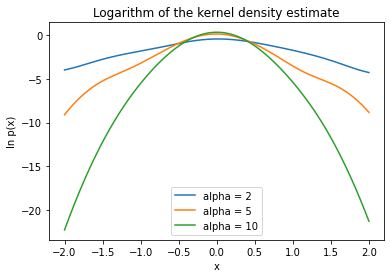

In [51]:
ks_density = ksdensity(alpha_2, width=0.25)
ks_density_5 = ksdensity(alpha_5, width=0.25)
ks_density_10 = ksdensity(alpha_10, width=0.25)


ar = np.linspace(-2,2,1000)
plt.plot(ar, np.log(ks_density(ar)), label = "alpha = 2")
plt.plot(ar, np.log(ks_density_5(ar)), label = "alpha = 5")
plt.plot(ar, np.log(ks_density_10(ar)), label = "alpha = 10")
plt.title('Logarithm of the kernel density estimate')
plt.legend()
plt.xlabel('x')
plt.ylabel('ln p(x)')
plt.show()



In [ ]:
# Formula for P(X):

#Logarithm of the pdf estimate looks to be a normal distribution with mean 0
# and variance of around 1, but has value 0 at x = 0 instead.
# therefore lnpx = Normal distribution shifted downwards, with alpha determining
# the height, and the width of the distributio.n.
# Higher alpha means higher height
px = exponential of (N(0, u\) - somefunction of variance as it determines height-> some function of alpha)
